In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
from vega_datasets import data
import matplotlib.pyplot as plt

In [2]:
df_user = pd.read_json('yelp_dataset/yelp_academic_dataset_user.json', lines=True)
df_tip = pd.read_json('yelp_dataset/yelp_academic_dataset_tip.json', lines=True)
df_review = pd.read_json('yelp_dataset/yelp_academic_dataset_review.json', lines=True)
df_checkin = pd.read_json('yelp_dataset/yelp_academic_dataset_checkin.json', lines=True)
df_business = pd.read_json('yelp_dataset/yelp_academic_dataset_business.json', lines=True)
df_photos = pd.read_json('yelp_photos/photos.json', lines=True)

In [ ]:
df_user.head(3)

In [4]:
df_tip.head(3)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0


In [5]:
df_review.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30


In [6]:
df_checkin.head(3)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"


In [7]:
df_business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


How many users/tips/reviews/checkins/businesses?

In [8]:
msg = (
    f'number of users is {df_user.shape[0]:,}\n'
    f'number of tips is {df_tip.shape[0]:,}\n' 
    f'number of reviews is {df_review.shape[0]:,}\n'
    f'number of checkin is {df_checkin.shape[0]:,}\n' 
    f'number of business is {df_business.shape[0]:,}\n'
)
print(msg)

number of users is 1,987,897
number of tips is 908,915
number of reviews is 6,990,280
number of checkin is 131,930
number of business is 150,346



What are the statistics of users review count?
> * total of 46,505,676 reviews from users data
> * 54 users don't have any reviews

In [87]:
df_user.review_count.sum()

46505676

In [131]:
(df_user.review_count == 0).sum()

54

In [76]:
df_user.review_count.describe()

count    1.987897e+06
mean     2.339441e+01
std      8.256699e+01
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.700000e+01
max      1.747300e+04
Name: review_count, dtype: float64

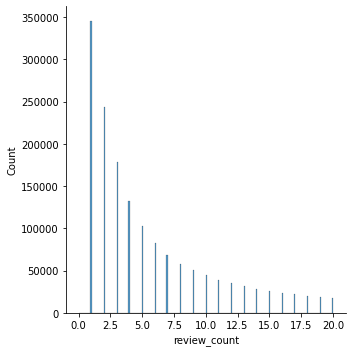

In [73]:
sns.displot(data=df_user[df_user.review_count <= 20], x="review_count")

How many friends does a user have in average?
> 53

How many users don't have a friend?
> 878,551, 44.2%  

In [26]:
num_friends = pd.Series([len(friends_ls) if friends_ls[0] != "None" else 0 for friends_ls in df_user.friends.str.split(",")])

In [27]:
df_user['num_friends'] = num_friends = num_friends

In [28]:
num_friends.describe()

count    1.987897e+06
mean     5.293306e+01
std      1.466023e+02
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      4.600000e+01
max      1.499500e+04
dtype: float64

In [29]:
no_friend = len(num_friends[num_friends == 0])
print(f"{no_friend:,} users have no friends, account for {no_friend/len(num_friends):.1%}")

878,551 users have no friends, account for 44.2%


In [55]:
one_friend = len(num_friends[num_friends == 1])

In [54]:
two_friend = len(num_friends[num_friends == 2])

In [59]:
print(f'{no_friend + one_friend + two_friend:,}, {(no_friend + one_friend + two_friend)/len(num_friends):.2%}')

1,051,577, 52.90%


[Text(0.5, 0, 'Number of Friends (1-46 friends)'), Text(0, 0.5, '')]

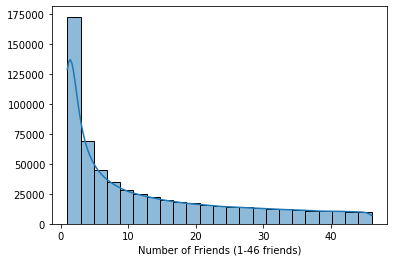

In [76]:
sns.histplot(
    data=df_user[(df_user.num_friends>0) & (df_user.num_friends<=46)], 
    x="num_friends", kde=True, bins=23
).set(
    xlabel='Number of Friends (1-46 friends)',
    ylabel=''
)

Is there any correlation among reviews, number of friends and number of fans?
> * number of fans and number of friends have positive relationship
> * no obvious relations of review count to other two attributes
> * there are some outliers

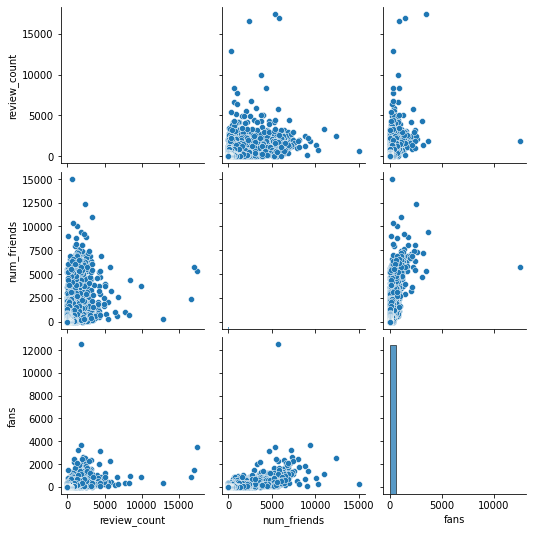

In [78]:
sns.pairplot(data=df_user[["review_count", "num_friends", "fans"]])

<AxesSubplot:>

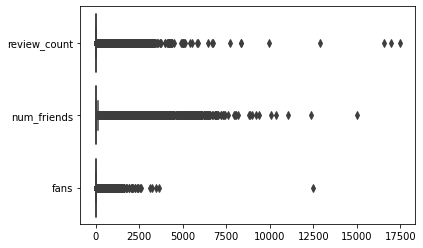

In [75]:
sns.boxplot(data=df_user[["review_count", "num_friends", "fans"]], orient="h")

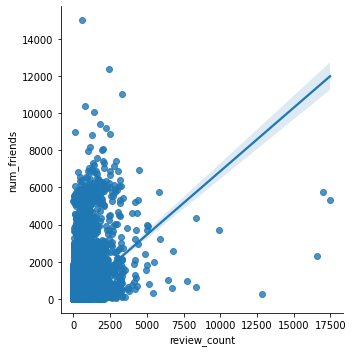

In [79]:
sns.lmplot(data=df_user, x="review_count", y="num_friends")

[Text(0.5, 0, 'Number of Reviews'), Text(0, 0.5, 'Number of Friends')]

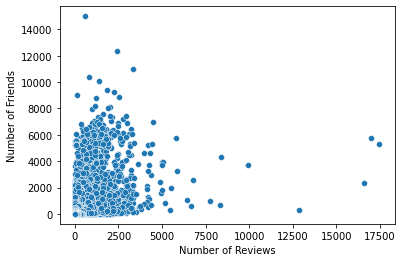

In [86]:
sns.scatterplot(data=df_user, x="review_count", y="num_friends").set(
    xlabel="Number of Reviews",
    ylabel="Number of Friends"
)

[Text(0.5, 0, 'Number of Reviews'), Text(0, 0.5, 'Number of Fans')]

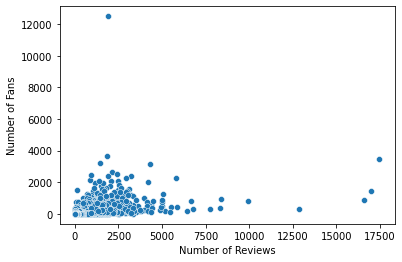

In [88]:
sns.scatterplot(data=df_user, x="review_count", y="fans").set(
    xlabel="Number of Reviews",
    ylabel="Number of Fans"
)

[Text(0.5, 0, 'Number of Friends'), Text(0, 0.5, 'Number of Fans')]

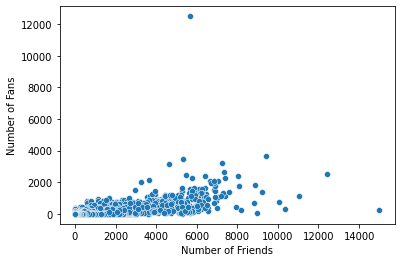

In [96]:
sns.scatterplot(df_user, x="num_friends", y="fans").set(
    xlabel="Number of Friends",
    ylabel="Number of Fans"
)

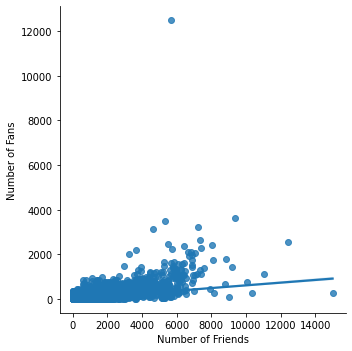

In [92]:
sns.lmplot(df_user, x="num_friends", y="fans").set(
    xlabel="Number of Friends",
    ylabel="Number of Fans"
)

Where are businesses locate and how many in each state?
> 27 states, in which 13 states have less than 10 business.

In [179]:
state_business = df_business.groupby(['state'])['state'].count()

In [180]:
state_business.size

27

In [181]:
state_business[state_business < 10].size

13

In [183]:
state_id = pd.read_csv("state_id.csv")
state_business = state_business.to_frame().rename(columns={"state": "count"}).reset_index().merge(state_id, how='outer', left_on="state", right_on="state")

In [184]:
state_business['count'] = state_business['count'].fillna(0)

In [110]:
states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape(
    stroke="gray"
).encode(
    color='count:Q',
    tooltip=['state:N', 'count:Q']
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(state_business, 'id', ['count', 'state']),
).project(
    type='albersUsa'
).properties(
    width=1200,
    height=700
)

alt.Chart(...)

In [196]:
# sns.histplot(data=df_business, x="state")
alt.Chart(state_business.sort_values("count", ascending=False)[:14], title="Businesses by State").mark_bar().encode(
    x="count",
    y=alt.Y("state", sort="-x")
).properties(
    width=400*1.3,
    height=600*1.3
)

alt.Chart(...)

How many restaurants?

How many reviews do all businesses received?
> * all businesses received 6,745,508 reviews; 
> * there are 6,990,280 reviews in reviews dataset; 
> * all users made 46,505,676 reviews. 

In [81]:
df_user.review_count.sum()

46505676

In [79]:
df_business.review_count.sum()

6745508

How many businesses are closed?

In [88]:
num_open = df_business.groupby(['is_open'])['is_open'].count()
print(f'{num_open[0]:,}({num_open[0]/(num_open[0]+num_open[1]):.2%}) businesses are closed')

30,648(20.38%) businesses are closed


Business star-rating distribution
> * all businesses have rating, the minimum rating is 1
> * mean is 3.6, medium is 3.5

[Text(0.5, 0, 'Bussiness Rating'), Text(0, 0.5, '')]

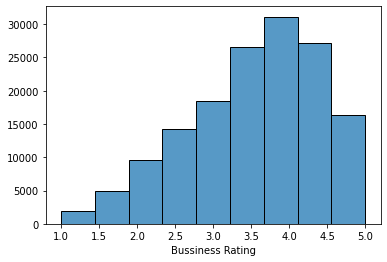

In [174]:
sns.histplot(data=df_business, x="stars", bins=9).set(
    xlabel="Bussiness Rating",
    ylabel=''
)

In [93]:
df_business.stars.describe()

count    150346.000000
mean          3.596724
std           0.974421
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64

In [98]:
pd.isnull(df_business.stars).sum()

0

Business categories distribution
> * 103 businesses don't any category
> * business have 4.4 sub-categories in average
> * there are 2454 sub-categories in total

In [98]:
df_business.categories[0]

'Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists'

In [99]:
cats = df_business.categories.str.split(",")

In [106]:
cats

0         [Doctors,  Traditional Chinese Medicine,  Natu...
1         [Shipping Centers,  Local Services,  Notaries,...
2         [Department Stores,  Shopping,  Fashion,  Home...
3         [Restaurants,  Food,  Bubble Tea,  Coffee & Te...
4                             [Brewpubs,  Breweries,  Food]
                                ...                        
150341                        [Nail Salons,  Beauty & Spas]
150342    [Pets,  Nurseries & Gardening,  Pet Stores,  H...
150343    [Shopping,  Jewelry,  Piercing,  Toy Stores,  ...
150344    [Fitness/Exercise Equipment,  Eyewear & Optici...
150345    [Beauty & Spas,  Permanent Makeup,  Piercing, ...
Name: categories, Length: 150346, dtype: object

In [100]:
pd.isna(cats).sum()

103

In [101]:
num_cats = pd.Series([0 if cat is None else len(cat) for cat in cats])

In [172]:
df_business[num_cats == 36]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,num_cats
143157,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,51 N 12th St,Philadelphia,PA,19107,39.953341,-75.158855,4.5,5721,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Candy Stores, Shopping, Department Stores, Fas...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",36


In [102]:
df_business['num_cats'] = num_cats

In [103]:
num_cats.describe()

count    150346.000000
mean          4.447022
std           2.233734
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          36.000000
dtype: float64

[Text(0.5, 0, 'Number of Categories per Business')]

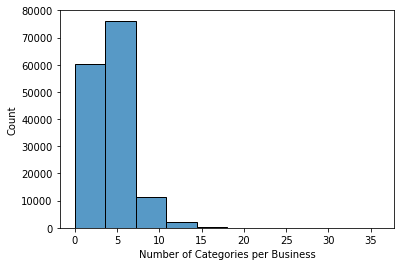

In [164]:
sns.histplot(data=df_business, x="num_cats", bins=10).set(
    xlabel="Number of Categories per Business"
)

In [117]:
cat_set = set()
for cat in cats.to_list():
    if cat is not None:
        for c in cat:
            cat_set.add(c.strip())

In [118]:
len(cat_set)

1311

In [120]:
cat_dict = {c: 0 for c in cat_set}
for cat in cats:
    if cat is not None:
        for c in cat:
            cat_dict[c.strip()] += 1

In [132]:
np.array(["=" in k for k in cat_dict.keys()]).sum()

0

In [151]:
df_cat = pd.DataFrame.from_dict(cat_dict, orient='index', columns=["count"]).reset_index().rename(columns={"index": "categories"})

In [152]:
df_cat.sort_values(by="count", ascending=False, inplace=True)

<AxesSubplot:xlabel='count', ylabel='Count'>

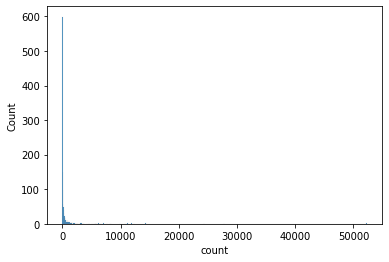

In [153]:
sns.histplot(data=df_cat, x="count")

In [156]:
df_cat

,categories,count
159,Restaurants,52268
808,Food,27781
36,Shopping,24395
88,Home Services,14356
1206,Beauty & Spas,14292
...,...,...
389,Mohels,1
837,Natural Gas Suppliers,1
844,Parklets,1
1154,Donburi,1


In [159]:
alt.Chart(df_cat[:26], title="Top 25 Categories").mark_bar().encode(
    x="count",
    y=alt.Y("categories", sort="-x")
)

alt.Chart(...)

In [163]:
52268/150346

0.3476514173972038

Check-in distribution

Number of reviews vs. time

Number of check-in vs. time

Number of tips vs. time

In [10]:
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
chart = alt.Chart(data)

In [25]:
chart = chart.mark_bar().encode(
    x=alt.X('a', title='category'),
    y='average(b)'
)
chart

alt.Chart(...)

In [6]:
review_sample = df_review[["user_id", "business_id", "review_id"]].sample(1000)

In [9]:
review_sample

,user_id,business_id,review_id
5607622,R7oqm48wW0h0n2veJOdJlw,bjPUhanWoinHi2kywvVzBA,pGF8NGmMN76vXAknT-dLjw
5765236,BKSTPFJt5z7aAxMG234yfg,Y2HPRyCYydIIJ__buVEUjg,LAgg0JWg8blJ2KaM0aPHwg
5686324,Cc_PQdU6sXiJSFxi3kBW_g,DZYSb9amfB3EAh1IdwtbEA,Fm2FEtzk9qd9-cC30t6b5w
474745,g1LkJdSXJJba3X-NK6Dm4A,SsRsSSifdOtKAQDGST_m_g,D3XFfiMxuolDmyXnY4i6Tw
6614204,RkCGwQ7FnZKZCAphOOoc5w,yoQBK3OUDqWEFoUDE5lM4w,gP72UUY14mqyZqYYLv6jnw
...,...,...,...
4942224,jEG8bTa87OfJZaf19nR9Iw,0qcKKhE731dpH7znxJyu6g,QFOnTwgt6Iu8l4iXn-ck2g
6286465,THJo4sOXgM4jxA9UUocJag,CXpASI9UCrtk-Zo57fdi7Q,k9goxljbPhhPHOgERN4vgg
2221693,zfjPoxCzfVlYD4H92roC2g,pvEMxB2cF8YWKzGprzUxVw,3ciVEruPfiZXnbMxF4MKaA
826121,dmzxorUVQ6hZdE_DiQOftA,xXFSEWRO0012YBbdoJ1kRw,JlPnK5l9thCoblM8xX_Bsw


In [12]:
review_sample.groupby(by="user_id")["business_id"].apply(','.join).reset_index()

,user_id,business_id
0,-11CHis1MMgHAuDUXgmBKw,ReV4Q3rEJ8neicQPc6pC0w
1,-2S46n2II6xBLolCr7wDaQ,vC2vhaJmX1RpExoHcPOb_A
2,-2cKJFFNJ9XVyWBt62mWvA,49Gyz-LD9MxTh1yzbYiOhw
3,-EGfUeB68wp_cCv3wTn5iw,tTAb4vrTgcmm0eLC8qy3qw
4,-LRiiyEPj4hm04PppERpXQ,4_W5pstoN1166TGjjPOrMg
...,...,...
992,zl07DAcczbKn-aCgDMXD7Q,SzSLKafTPOQzp3pfzPjEVg
993,zo9vfjCiQmhhwXajP5ZQMw,0Ig_UBuJZctyPw-DajuyiA
994,zuUshB6U2V9NB0KfRgWjjA,1jeaxiZOisgDMxHR2K088g
995,zx_xYrExwLca2iuqtyritw,of-GVqY0G_UDHXT9Xg_ADQ


In [17]:
%%timeit
user_review = df_review[["user_id", "business_id", "review_id"]].groupby(by="user_id")["business_id"].apply(','.join).reset_index()

5min 16s ± 8.76 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
user_review

NameError: name 'user_review' is not defined